# Bank Marketing Dataset — Data Preparation and Feature Engineering

Student: Jose Bouza Femenia


## Task 1 — Data Loading and Initial Inspection


In [3]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns when printing
pd.set_option("display.max_columns", None)

print("Environment ready.")

Environment ready.


In [4]:
# Load dataset 
df = pd.read_csv("../data/bank-additional.csv", sep=";")

# Display first rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
# Check dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Inspect column types
print("\nColumn data types:\n")
print(df.dtypes)

# Compute normalized distribution of target variable
target_distribution = df["y"].value_counts(normalize=True)

print("Target distribution (proportion):")
print(target_distribution)

Dataset shape: (4119, 21)

Column data types:

age                 int64
job                   str
marital               str
education             str
default               str
housing               str
loan                  str
contact               str
month                 str
day_of_week           str
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome              str
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                     str
dtype: object
Target distribution (proportion):
y
no     0.890507
yes    0.109493
Name: proportion, dtype: float64


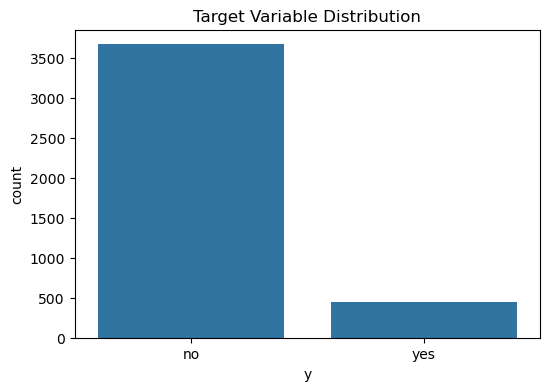

In [6]:
# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="y")
plt.title("Target Variable Distribution")
plt.show()

The target variable is clearly imbalanced, with a large majority of "no" outcomes.

In [11]:
# Missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
# Unknow values
(df == "unknown").sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

Although no explicit missing values are present, several categorical variables contain the value "unknown", which represents implicit missing data. These values require careful handling before modeling.

To generate the visualization code for the numerical and categorical distributions, I used the following prompt in ChatGPT:

"Generate Python code using seaborn and matplotlib to visualize:
- two numerical variables (histograms),
- two categorical variables (count plots),
for exploratory data analysis in a classification dataset."

The code was then adapted and integrated into this notebook.

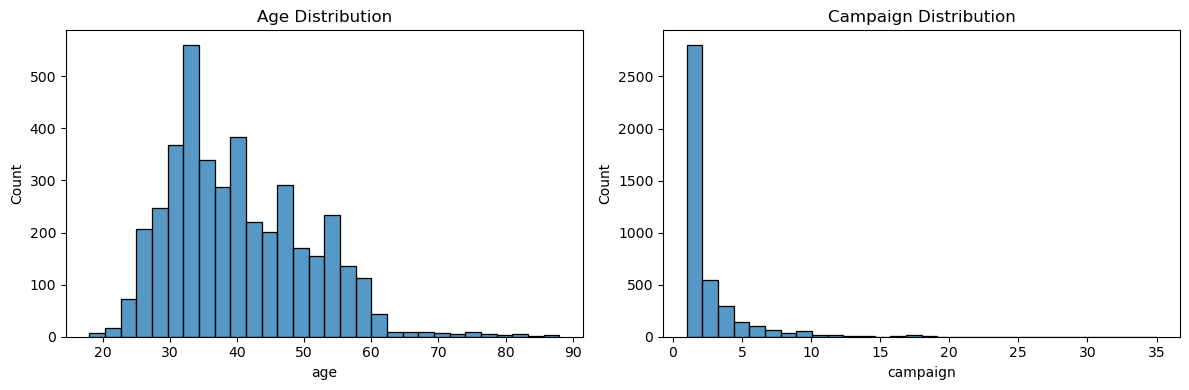

In [15]:
# Visualize distribution of 2 numerical values (Age and campaign)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["age"], bins=30, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["campaign"], bins=30, ax=axes[1])
axes[1].set_title("Campaign Distribution")

plt.tight_layout()
plt.show()

The variable age appears approximately unimodal, with most clients between 25 and 55 years old.

On the other hand, the variable campaign is highly right-skewed. Most observations are concentrated at low values. This distribution may require transformation or special treatment before modeling.

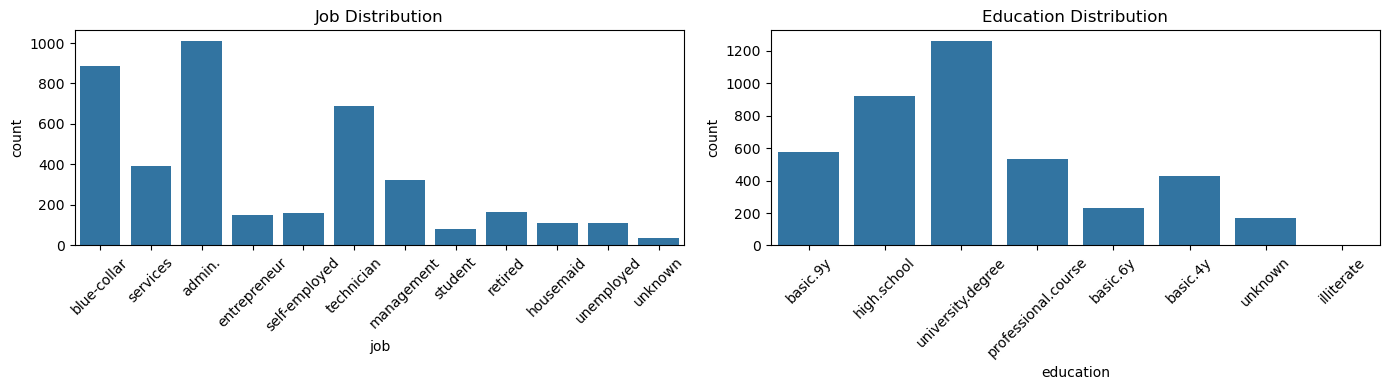

In [17]:
# Visualize distribution of 2 categorical values (Job and Education)
fig, axes = plt.subplots(1, 2, figsize=(14,4))

sns.countplot(data=df, x="job", ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title("Job Distribution")

sns.countplot(data=df, x="education", ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title("Education Distribution")

plt.tight_layout()
plt.show()

The variable job shows heterogeneous distribution across categories, with admin and blue-collar roles being the most frequent. The presence of the category "unknown" suggests implicit missing values.

Similarly, education is dominated by high school and university degrees, but includes rare categories such as illiterate and also contains unknown.

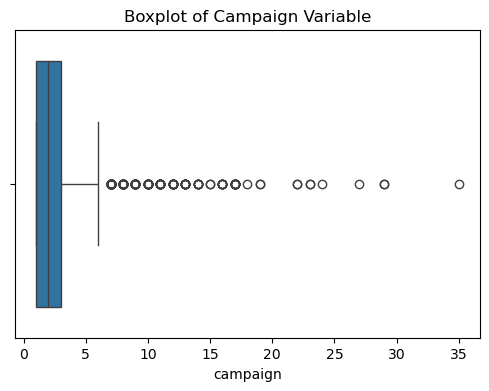

In [19]:
# Special requirement consideration
plt.figure(figsize=(6,4))
sns.boxplot(x=df["campaign"])
plt.title("Boxplot of Campaign Variable")
plt.show()

The variable campaign exhibits a highly right-skewed distribution, as shown in the boxplot. These extreme values may disproportionately influence certain models, particularly linear models, and may reduce numerical stability. Therefore, this variable may require transformation or treatment of extreme values before modeling.